In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from treelib import Node, Tree

## Introduction to the entropy

Entropy is a measure of information, used in many fields, including physics, statistics and machine learning. In information theory, entropy represents the amount of uncertainty or surprise in a random variable or sequence. It quantifies the average amount of information produced by a stochastic process or received through a communication channel. High entropy implies higher unpredictability or randomness, while low entropy indicates more predictability or order. For instance, if Alice tosses a fair coin and records the result, how many bits of information does she need to send it to Bob so that he knows the result as well? He needs exactly one bit (0 = heads, 1 = tail) on average. We always assume they both know what the setup of the experiment is.

The entropy is written $H(x)$ and is defined as:
$H(x) = \mathbb{E}[-log_2(x)] = - \Sigma_{i=1}^N p(x_i) log_2(p(x_i))$.

A bit of intuition

**(1)** - As a measure of information, we want the entropy to be additive. If you get one e-mail, you get n bits of information, if you get two e-mails, you get n+m bits of information. Unfortunately, when two independant random variables are realized, they are multiplied together : $p(x_a \cap x_b) = p(x_a)p(x_b)$. In order to make them additive, the logarithm function can be used: $\log p(x_a \cap x_b) = \log p(x_a) + \log p(x_b)$.

**(2)** - The rarer the event, the more information must be transferred when it occurs. For instance, if a coin is rigged and always gives tail, Alice doesn't even need to send anything to Bob, since he already know that it will be tail. Remember that both Alice and Bob know the exact setup of the experiment. Newspaper tend to follow this trend as well: they don't talk about how the sun will rise this morning, talk a bit about the weather forecast (a few numbers) but might dedicate a full page to the new, shiney and overhyped tv-series dedicated to the life of Carl XVI Gustaf. So the amount of information is invertly proportional to the probability: $1/p(x)$.

**(3)** - So far we have $log_2(1/(p(x)) = -log_2(p(x))$, and we take its expectation such that it gives the average information in a random variable. **Note that the base of the log is arbitrary, you will often see either $e$ or $2$ as a base**. I personnaly enjoy using $log_2$ because the entropy will be in bits which is easier to interpret (with $e$, the entropy will be in nats).

### Exercise: Entropy of the Normal distribution

Calculate the (base 2) entropy of a Normal distribution.

The pdf of the Normal distribution is: $\frac{1}{\sqrt{2 \pi \sigma^2}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$.
You need to find: $\mathbb{E}[-log_2(\frac{1}{\sqrt{2 \pi \sigma^2}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})]$
Do it step-by-step, first the log (base 2), then flip the signs, then take the expectation of the remaining formula.

The result will be: $\frac{1}{2} log_2(2 \pi e \sigma^2)$

Formulas to use (or not, as you want, who am I to dictate anything?):
* $\log_2(a*b) = \log_2(a) + \log_2(b)$
* $\log_2(x) = \log(x)/\log(2)$
* $\log_2(\exp(u)) = u/\log(2)$. Be careful!! The $\log_2$ is no longer base 2 in the right hand side, but base $e$.
* $\mathbb{E}[ax + by] = a\mathbb{E}[x] + b\mathbb{E}[y]$. That means that all the constants go out of the expectation. In this case, both $\mu$ and $\sigma^2$ are constants. $x$ is not constant.
* $\mathbb{E}[x] = \mu$ and $\mathbb{V}[x] = \sigma^2$.
* $\mathbb{E}[(x - \mu)^2 / \sigma^2] = \mathbb{E}[(x - \mu)^2] / \sigma^2 = \mathbb{V}[x] / \sigma^2 = \sigma^2/\sigma^2 = 1$
* $1/\log(2) = \log_2(2^{1/log(2)}) = \log_2(e)$

Now that you have found the entropy of a normal distribution we can wonder about the intuitive meaning of the thing. First, the entropy has only one variable: $\sigma^2$. Let's imagine a friend of yours invented a new die that, when tossed gives you a random number sampled from a normal distribution (rounded to the nearest integer). He calls it the Normal Die ™️ (confusing name, I know, there's already a lot of hatred for the normal distribution being called that way). Like for a regular die, where you know the probability of each face, you are given the mean and the variance. If I buy one such die, and toss it, how many bits do I need to send to you for you to know which value is displayed on the die? The entropy formula gives you that, but:
* If the mean is 0, 20 or -37, the entropy doesn't change. This is because you know the mean is common knowledge, and your friend only needs to send the deviation from the mean to you. If the mean is 20, he tosses the dice and get 24, but only needs to send 24-20=+4 (2 bits, plus a sign bit = 3 bits in total) to you. When you get the result: +4, you just have to add the mean to recover the true number. Remember that the mean and variance are common knowledge.
* The bigger $\sigma^2$, the bigger the variance and the more bits I need to send to you.
This is what the formula above states, meaning entropy is also a measure of uncertainty. More variance means more bits to send, so a bigger entropy.

Advanced note: you might notice that if the variance is 0, the log is negative ($- \infty$) do not get confused, and just considered that negative entropies get clipped to 0 bits. This works because we rounded the values generated by the continuous normal distribution.

## Entropy of a coin toss

Let's imagine we can choose how to rig a coin so that we can choose its average probability of heads. That setup is exactly how a Bernoulli r.v. works. You choose its parameter $\theta$ and then $p(heads) = \theta$. Note that $\theta \in [0, 1]$ and for most coins: $\theta = 0.5$.

* Step 1: Find and write down the formula for the entropy of a bernoulli variable on the internet. Wikipedia is an excellent resource in statistics (and often reliable, but don't cite it still). Do not forget to change the $log$ into $log_2$!

* Step 2: The formula involves $x * log_2(x)$. What happens when $x = 0$? We get $0 * -\infty = I.F.$, so this is clearly not the right approach. The good way of finding out what happens is by applying [L'Hôpital's rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) and finding the limit of $x * log(x)$ when $x$ approaches 0. You can either do it as an exercise if you think it's fun (it is quick and rewarding in practice, give it a shot :), or you can look up the answer in the Wikipedia page above.

* Step 3: Plot the entropy of a bernoulli r.v. below. Do not forget to use the right base for the log (log base 2 exists in numpy, look it up). And make it so that it works even when $p$ is 0 and 1.

* Step 4: What can you conclude about the plot? Does it correspond to what is written up there (what is the entropy when the parameter is 0, 0.5, 1)? What parameter gives the highest entropy?

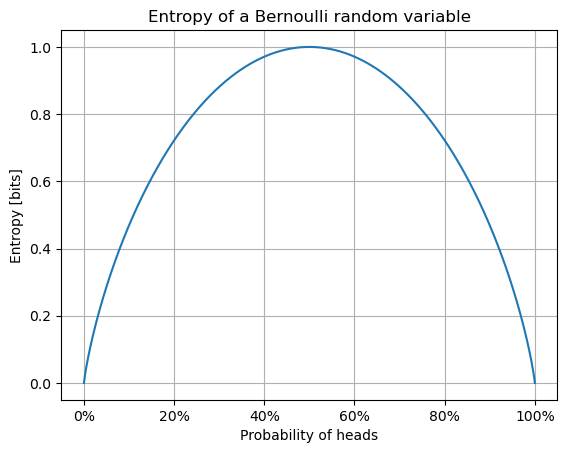

In [30]:
# Domain of the parameter p of a Bernoulli rv: p ∈ [0, 1]
p = np.linspace(0, 1, 1000)

def xln2x(x):
    """ Computes x * log_2(x) in a safe way."""
    if not isinstance(x, np.ndarray):
        x = np.array(x)
    
    results = np.zeros_like(x)  # Initialize results array
    
    # Compute x * log_2(x) where x is not zero
    non_zero_mask = x != 0
    results[non_zero_mask] = x[non_zero_mask] * np.log2(x[non_zero_mask])
    
    return results

def calc_entropy(p):
    return -xln2x(p) - xln2x(1 - p)

entropy = calc_entropy(p)

plt.figure()
plt.title("Entropy of a Bernoulli random variable")
plt.plot(p, entropy)
plt.xlabel("Probability of heads")
plt.gca().get_xaxis().set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Entropy [bits]")
plt.grid()
plt.show()

## Entropy of a sequence

Let's now make the distinction between the empirical entropy -- the average information in a sequence -- with the information content -- how much information there is in total in a sequence. For instance, a fair coin has an entropy of 1 bit, but when tossed 4 times has an information content of 4 bits (a.k.a a nibble).

Now implement a function that calculates the entropy of a binary sequence yourself. First, calcultate the parameter p, then plug it in the formula of the entropy (bernoulli).

In [35]:
def binary_entropy(seq):
    """ Returns the empirical entropy of a sequence.
    Input values should contain only 0s and 1s."""
    # If seq is not a numpy array, it becomes one
    if not isinstance(seq, np.ndarray):
        seq = np.array(seq)

    # To handle empty lists
    p = 0
    if len(seq) != 0:
        # This works since input values are either 0 or 1
        p = np.mean(seq)
    
    entropy = calc_entropy(p)
    
    return entropy

assert binary_entropy([0]) == 0, "Failed test 1"
assert binary_entropy([0, 1]) == 1, "Failed test 2"
assert binary_entropy([0]*10 + [1]*10) == 1, "Failed test 3"
assert np.abs(binary_entropy([0] + [1]*8) - 0.50326) < 1e-5, "Failed test 4"
assert binary_entropy([]) == 0, "Failed test 5"

### When the sequence has more than two outcomes

Unlike the coin toss, there can be situations where there are more than two outcomes. Rolling a dice is a situation where there are 6 outcomes (assuming the dice has 6 faces). When a fair dice is rolled, one can get either 1 or 2 or 3 or 4 or 5 or 6. Each face has an equal probability to appear. We can still calculate the entropy using the definition introduced at the very beginning of this notebook.

Now implement a funtion that calculates the entropy of a random sequence. Make sure you use `xln2x(p)` to calculate values.

In [38]:
def calculate_entropy(sequence):
    # Convert sequence to numpy array for easier manipulation
    probabilities = sequence.values.flatten() # Ändra här <---- TODO:
    
    # Compute the entropy using the probabilities
    entropy = -np.sum(xln2x(probabilities))
    
    return entropy

sequence = pd.DataFrame(data=[1/6 for i in range(6)])
assert calculate_entropy(sequence) == 2.584962500721156, "Failed test"

## Find the animal in 20 questions

As a kid, you might have travelled by car over long distances and been bored for hours on end and played this game: find the animal/object in so many questions. Perhaps you just were lucky and played the Sims 2 on a portable PlayStation 2. Whatever.

This exercise consists of automating the 20 questions game such that it asks 20 questions (or more or less) to find an animal the player has chosen. When you have kids on your own someday (or already), you can entertain your kids for 12+ hours when you travel.

You are given a dataset, the columns correspond to features, the rows to names of animals. A given animal has a set of binary features. For instance, a bear has hair, lactate, is a mammal and predator, has teeth, breathes, and so on.

You will have to implement an algorithm that creates a binary decision tree and use this tree to create a questionaire (this step is already done for you below) and find an animal in as few guesses as possible.
The algorithm to use is ID3, you can refer to the [lecture material](https://user.it.uu.se/~justin/Hugo/courses/machinelearning/lecture8/) to find the algorithm. The measure to use is the entropy and the information gain to choose the top most nodes in the decision tree. The feature with the higher information gain will be closer to the root node. You will have to implement the function `information_gain()` to help with `generate_tree()`.

In [ ]:
# Download and load the dataset into pandas
dataset_url = "https://raw.githubusercontent.com/earthtojake/20q/master/data/small.csv"
# There is a bigger dataset at
# dataset_url = "https://raw.githubusercontent.com/earthtojake/20q/master/data/big.csv"
df = pd.read_csv(dataset_url, index_col=0)
df.head()

In [ ]:
def information_gain(sample, feature):
    # Assume that sample is a pandas data frame
    # Assume that feature is some column appearing in sample.
    # STUDENT CODE:
    return

In [ ]:
tree = Tree()
tree.create_node("Root", "root")  # root node

def generate_tree(data, tree, branch="", parent="root"):
    """Populates the tree with questions and candidate animals.
    
    Args:
        data: The dataset to use
        tree: The tree to populate
        branch: '+' if the previous condition was true, '-' otherwise.
        parent: The parent node, so that we can attach children nodes to it.
    
    Note: Treelib sorts the name of the nodes by alphabetical order, its important
    to name the nodes such that the first one is the result of a positive condition,
    the second one, the negative condition. This has been taken care of if you use
    the code template by naming the node "+something" and "-something" (In ASCII, +
    (42) is before - (45)).
    """
    # STUDENT CODE:
    # Find the column with the highest entropy
    entropies = ...
    # The columns with a null entropy can be removed
    ...
    # If there aren't any columns left to discriminate the animals, we stop
    # If there is only one animal and plenty of columns, we also stop
    no_column_left = ...
    one_animal_left = ...
    if no_column_left or one_animal_left:
        tree.create_node(branch+", ".join(data.index), parent=parent)
        return
    # If we are here, it means the data can be split some more.
    # entropies might have more columns than the current data, since
    # we removed some columns.
    ...
    # We find the column with the highest entropy
    ...
    # We add the column to the tree under the current parent
    node = tree.create_node(branch + selected_column, parent=parent)
    # we split the data by column and remove the said column
    mask = ...
    ...
    
    # We generate the branches **recursively**
    # If the answer to the question was "yes"
    generate_tree(data[mask], tree, branch="+", parent=node)
    # If the answer to the question was "false"
    generate_tree(data[~mask], tree, branch="-", parent=node)

# The tree is generated
generate_tree(df, tree)
# The tree is plotted
tree.show()

In [ ]:
print("Depth of the tree:", tree.depth())

### That's it!

Just enjoy what you have achieved!

In [ ]:
# No need to add code here!
# Just run this and enjoy :)
def ask_yesno(question):
    """Checks that the written answer is valid. Iterates otherwise."""
    while True:
        answer = input(question + " ").lower().strip()
        if answer == "y" or answer == "yes":
            return True
        if answer == "n" or answer == "no":
            return False
        print("Just answer 'yes' or 'no'.")

print("Pick an animal!")
print()

question = tree.children("root")[0]
while True:
    # Have we found the answer?
    if question.is_leaf():
        print("I think you chose a " + question.tag)
        break
    # Otherwise we keep asking
    answer = ask_yesno(question.tag)
    children = tree.children(question.identifier)
    question = children[0] if answer else children[1]